In [1]:
# 9,CongestionWindow
# 17,SmoothedRTT
# 20,RetransmissionTimeout
# 21,SocketSendBufferSize
# 22,SocketSendBufferBytes
# 23,SocketReceiveBufferSize
# 24,SocketReceiveBufferBytes
# 25,UnacknowledgedBytes

# # With ECN and no ECN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import matplotlib.pyplot as plt
# from gym import wrappers
# from gym import spaces
import math
import random
import re
import os
import sys
import seaborn as sns

In [3]:
col = ['Direction', 
        'Time', 
        'LocalIP', 
        'LocalPort',
        'ForeignIP',
        'ForeignPort', 
        'SlowStartThreshold', 
        'CongestionWindow', 
        'BandwidthControlledWindow', 
        'SendingWindow', 
        'ReceiveWindow', 
        'SendingWindowScalingFactor', 
        'ReceiveWindowScalingFactor', 
        'TCPFiniteStateMachine',
        'MaximumSegmentSize', 
        'SmoothedRTT', 
        'SACKEnabled', 
        'TCPFlags', 
        'RetransmissionTimeout', 
        'SocketSendBufferSize', 
        'SocketSendBufferBytes', 
        'SocketReceiveBufferSize', 
        'SocketReceiveBufferBytes', 
        'UnacknowledgedBytes', 
        'ReassemblyQueue', 
        'Flowid', 
        'Flowtype']

In [4]:
col[15]

'SmoothedRTT'

In [5]:
import os

def functionfilenameandpath(paths=['./'], extension='.log'):
    filepaths = []
    filenames = []

    for path in paths:
        for root, _, files_list in os.walk(path):
            for file_name in files_list:
                if file_name.endswith(extension):
                    file_name_path = os.path.join(root, file_name)
                    filenames.append(file_name)
                    filepaths.append(file_name_path)

    return filenames, filepaths

# Example usage with a list of folder paths
folderpaths = ['./client1_data', './client2_data']
filenames, filepaths = functionfilenameandpath(folderpaths, '.log')

filepaths.sort()
filenames.sort()
print(filenames)


['l4s_10Mbps_20ms_ecn_cubic_src1.siftr.log', 'l4s_10Mbps_20ms_ecn_dctcp_src2.siftr.log']


In [6]:
filepaths

['./client1_data\\l4s_10Mbps_20ms_ecn_cubic_src1.siftr.log',
 './client2_data\\l4s_10Mbps_20ms_ecn_dctcp_src2.siftr.log']

In [7]:
def remove_outliers_iqr(df, column_name):
    """
    Remove outliers from a specified column in a DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame.
    column_name (str): The name of the column from which to remove outliers.
    
    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [8]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


# Function to calculate statistics for a DataFrame
def calculate_statistics(df, column):
    return {
        'Median': df[column].median(),
        'Mean': df[column].mean(),
        '25th Percentile': df[column].quantile(0.25),
        '75th Percentile': df[column].quantile(0.75),
        'Minimum': df[column].min(),
        'Maximum': df[column].max()
    }

# Function to save statistics to a file
def save_statistics_to_file(stats_filename, statistics, title):
    with open(stats_filename, 'a') as f:
        f.write(f"Statistics for {title}:\n")
        for key, value in statistics.items():
            f.write(f"{key}: {value}\n")
        f.write("\n")

# Function to format y-axis labels with commas
def comma_format(x, pos):
    return f'{int(x):,}'

# Darker color-blind-friendly palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
colors = ['r','b']


In [9]:
def get_dataframe_from_filepath(logpath):
    data = []
    with open(logpath, 'r') as f:
        for line in f:
            cleaned_line = re.sub(r'\s', '', line)
            data.append(cleaned_line.split(','))
    
    # Remove header and footer lines
    print(logpath)
    data.pop(0)
    data.pop(-1)

    df = pd.DataFrame(data, columns=col)

    # Filter and process data
    df = df[df['Direction'] == 'o'].astype({'CongestionWindow': 'int32', 'Time': 'float64'})
    df['Time'] -= df['Time'].iloc[0]
    df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64') / 1000
    return df

In [10]:
df=get_dataframe_from_filepath(filepaths[1])
df['ForeignPort'].unique()

./client2_data\l4s_10Mbps_20ms_ecn_dctcp_src2.siftr.log


array(['51152', '51154', '51160', '5102', '51182'], dtype=object)

In [11]:
df=get_dataframe_from_filepath(filepaths[1])
df['ForeignPort'].unique()

./client2_data\l4s_10Mbps_20ms_ecn_dctcp_src2.siftr.log


array(['51152', '51154', '51160', '5102', '51182'], dtype=object)

In [12]:
filenames[:10]

['l4s_10Mbps_20ms_ecn_cubic_src1.siftr.log',
 'l4s_10Mbps_20ms_ecn_dctcp_src2.siftr.log']

In [23]:
unique_scenarios_dict={}
for index in range(len(filenames)):
    scenario = "_".join(filenames[index].split('_')[:4])
    if scenario in unique_scenarios_dict:
        unique_scenarios_dict[scenario].append(filepaths[index])
    else:
        unique_scenarios_dict[scenario]=[filepaths[index]]


./client1_data\l4s_10Mbps_20ms_ecn_cubic_src1.siftr.log
Statistics saved to ./stats/l4s_10Mbps_20ms_ecn_cubic_src1.siftr.log_statistics_results.txt
Statistics saved to ./stats/l4s_10Mbps_20ms_ecn_cubic_src1.siftr.log_statistics_results.txt
i:, 0
colors[i] r
i:, 1
colors[i] b


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


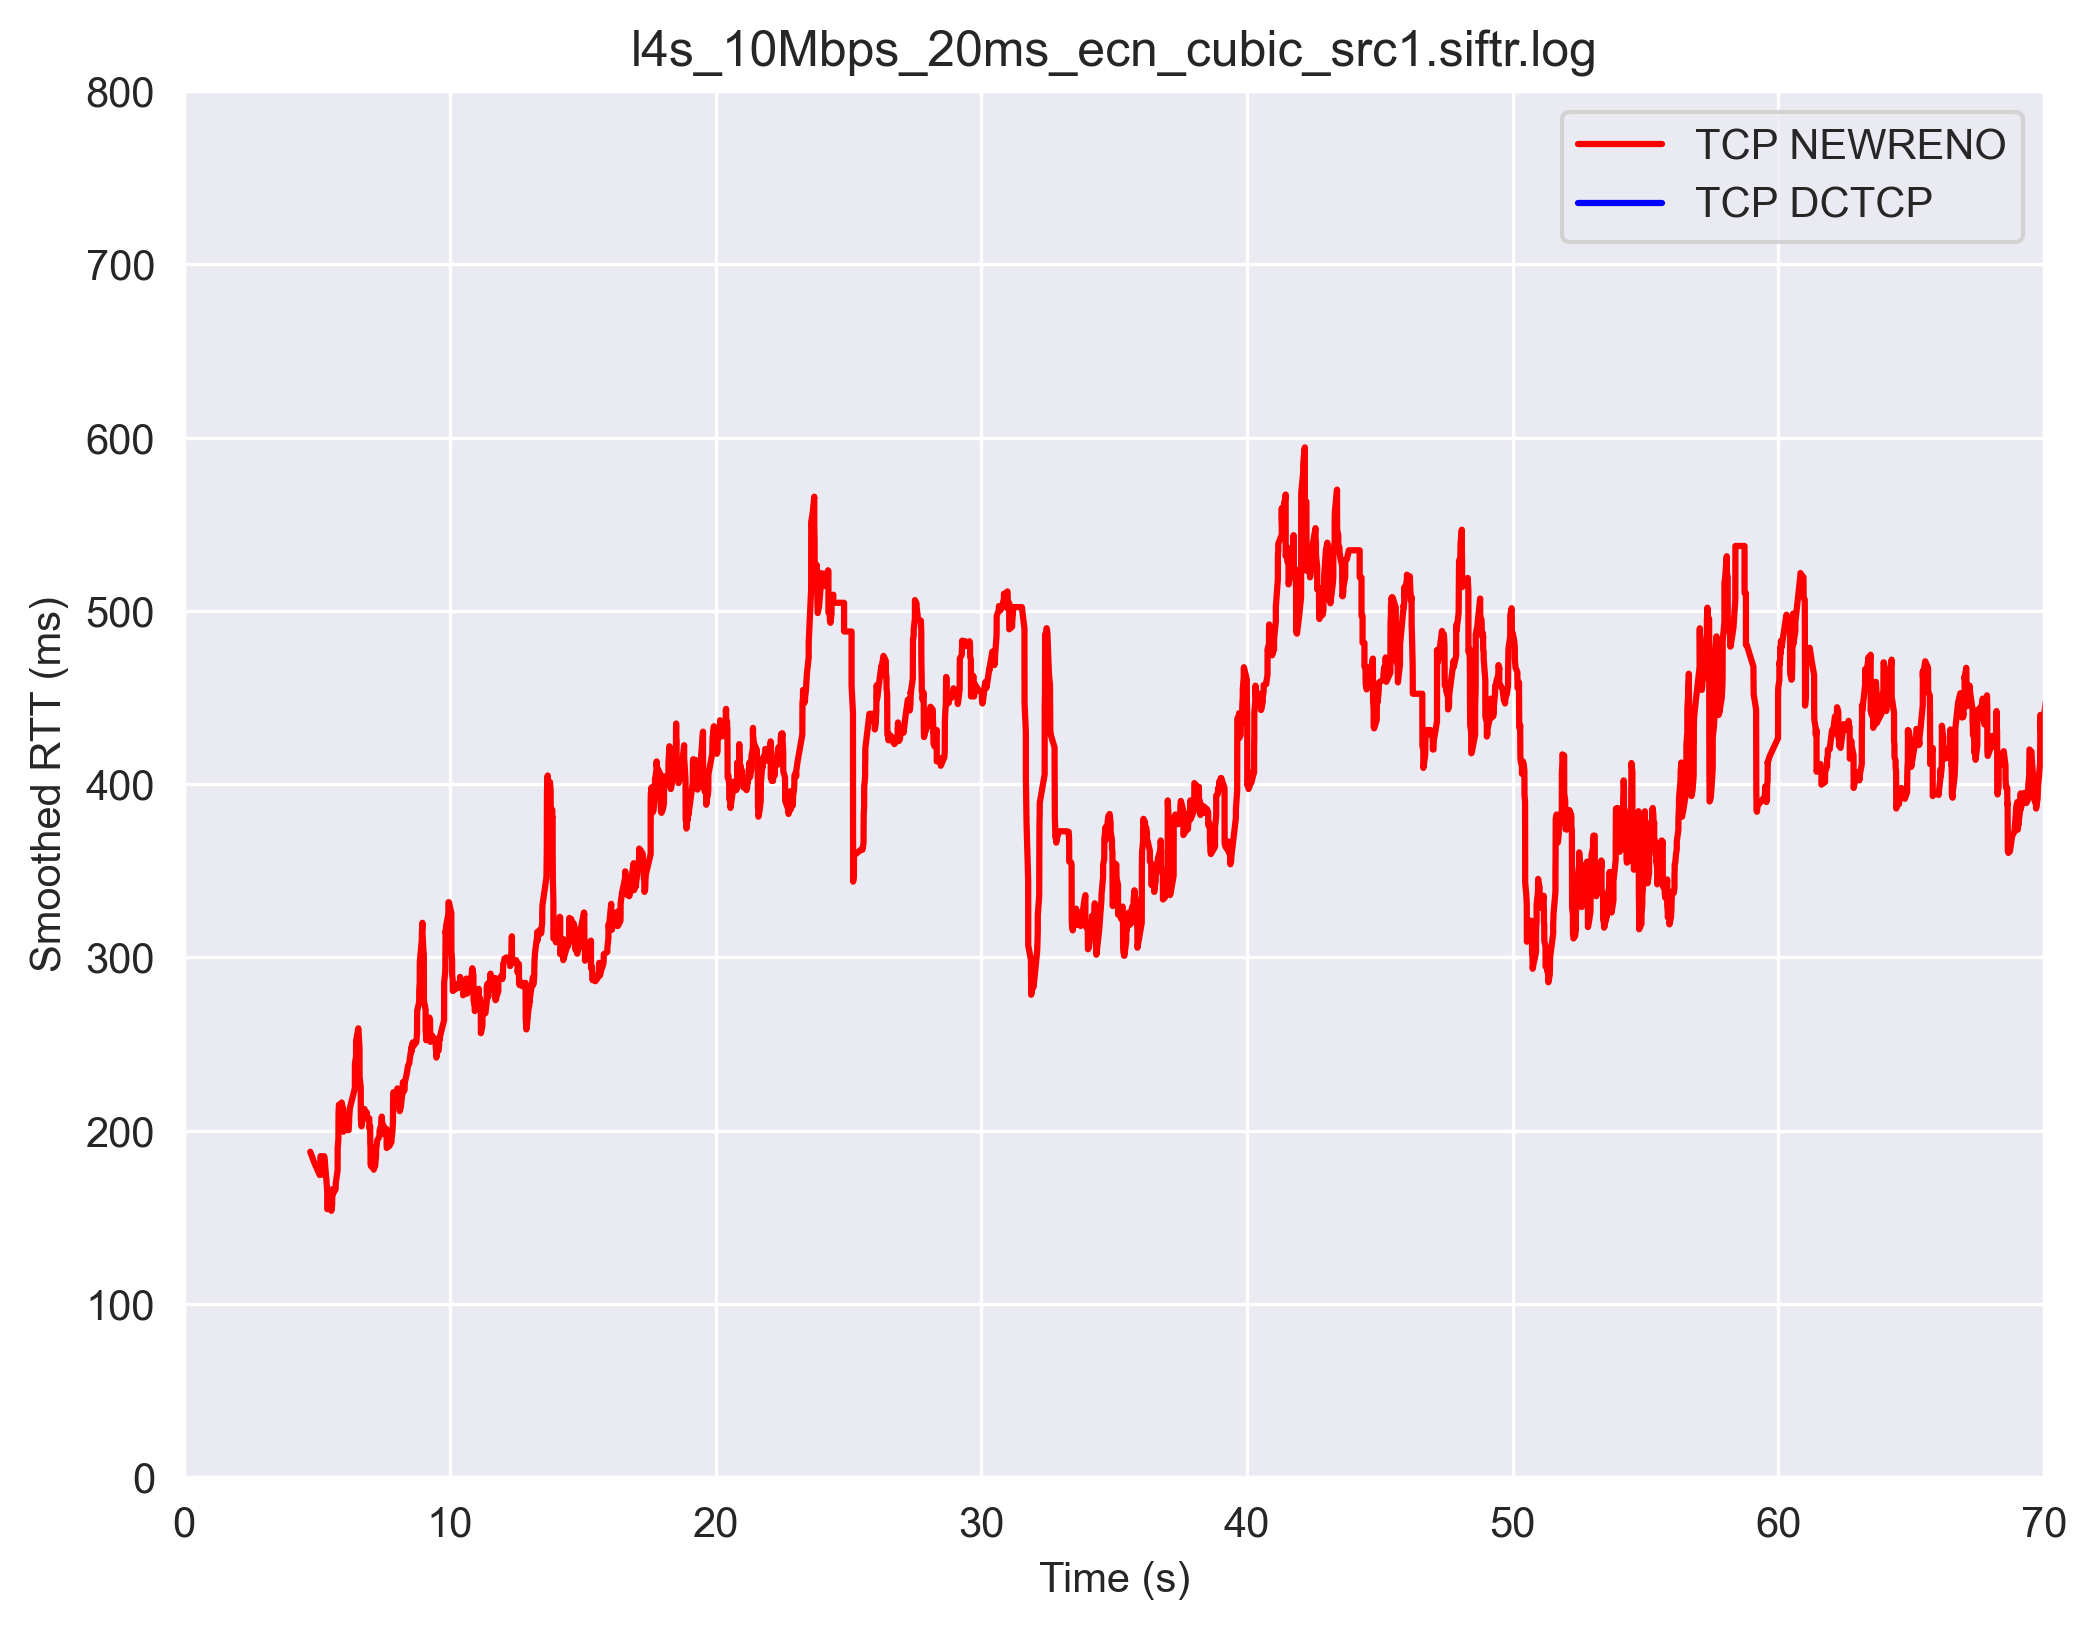

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


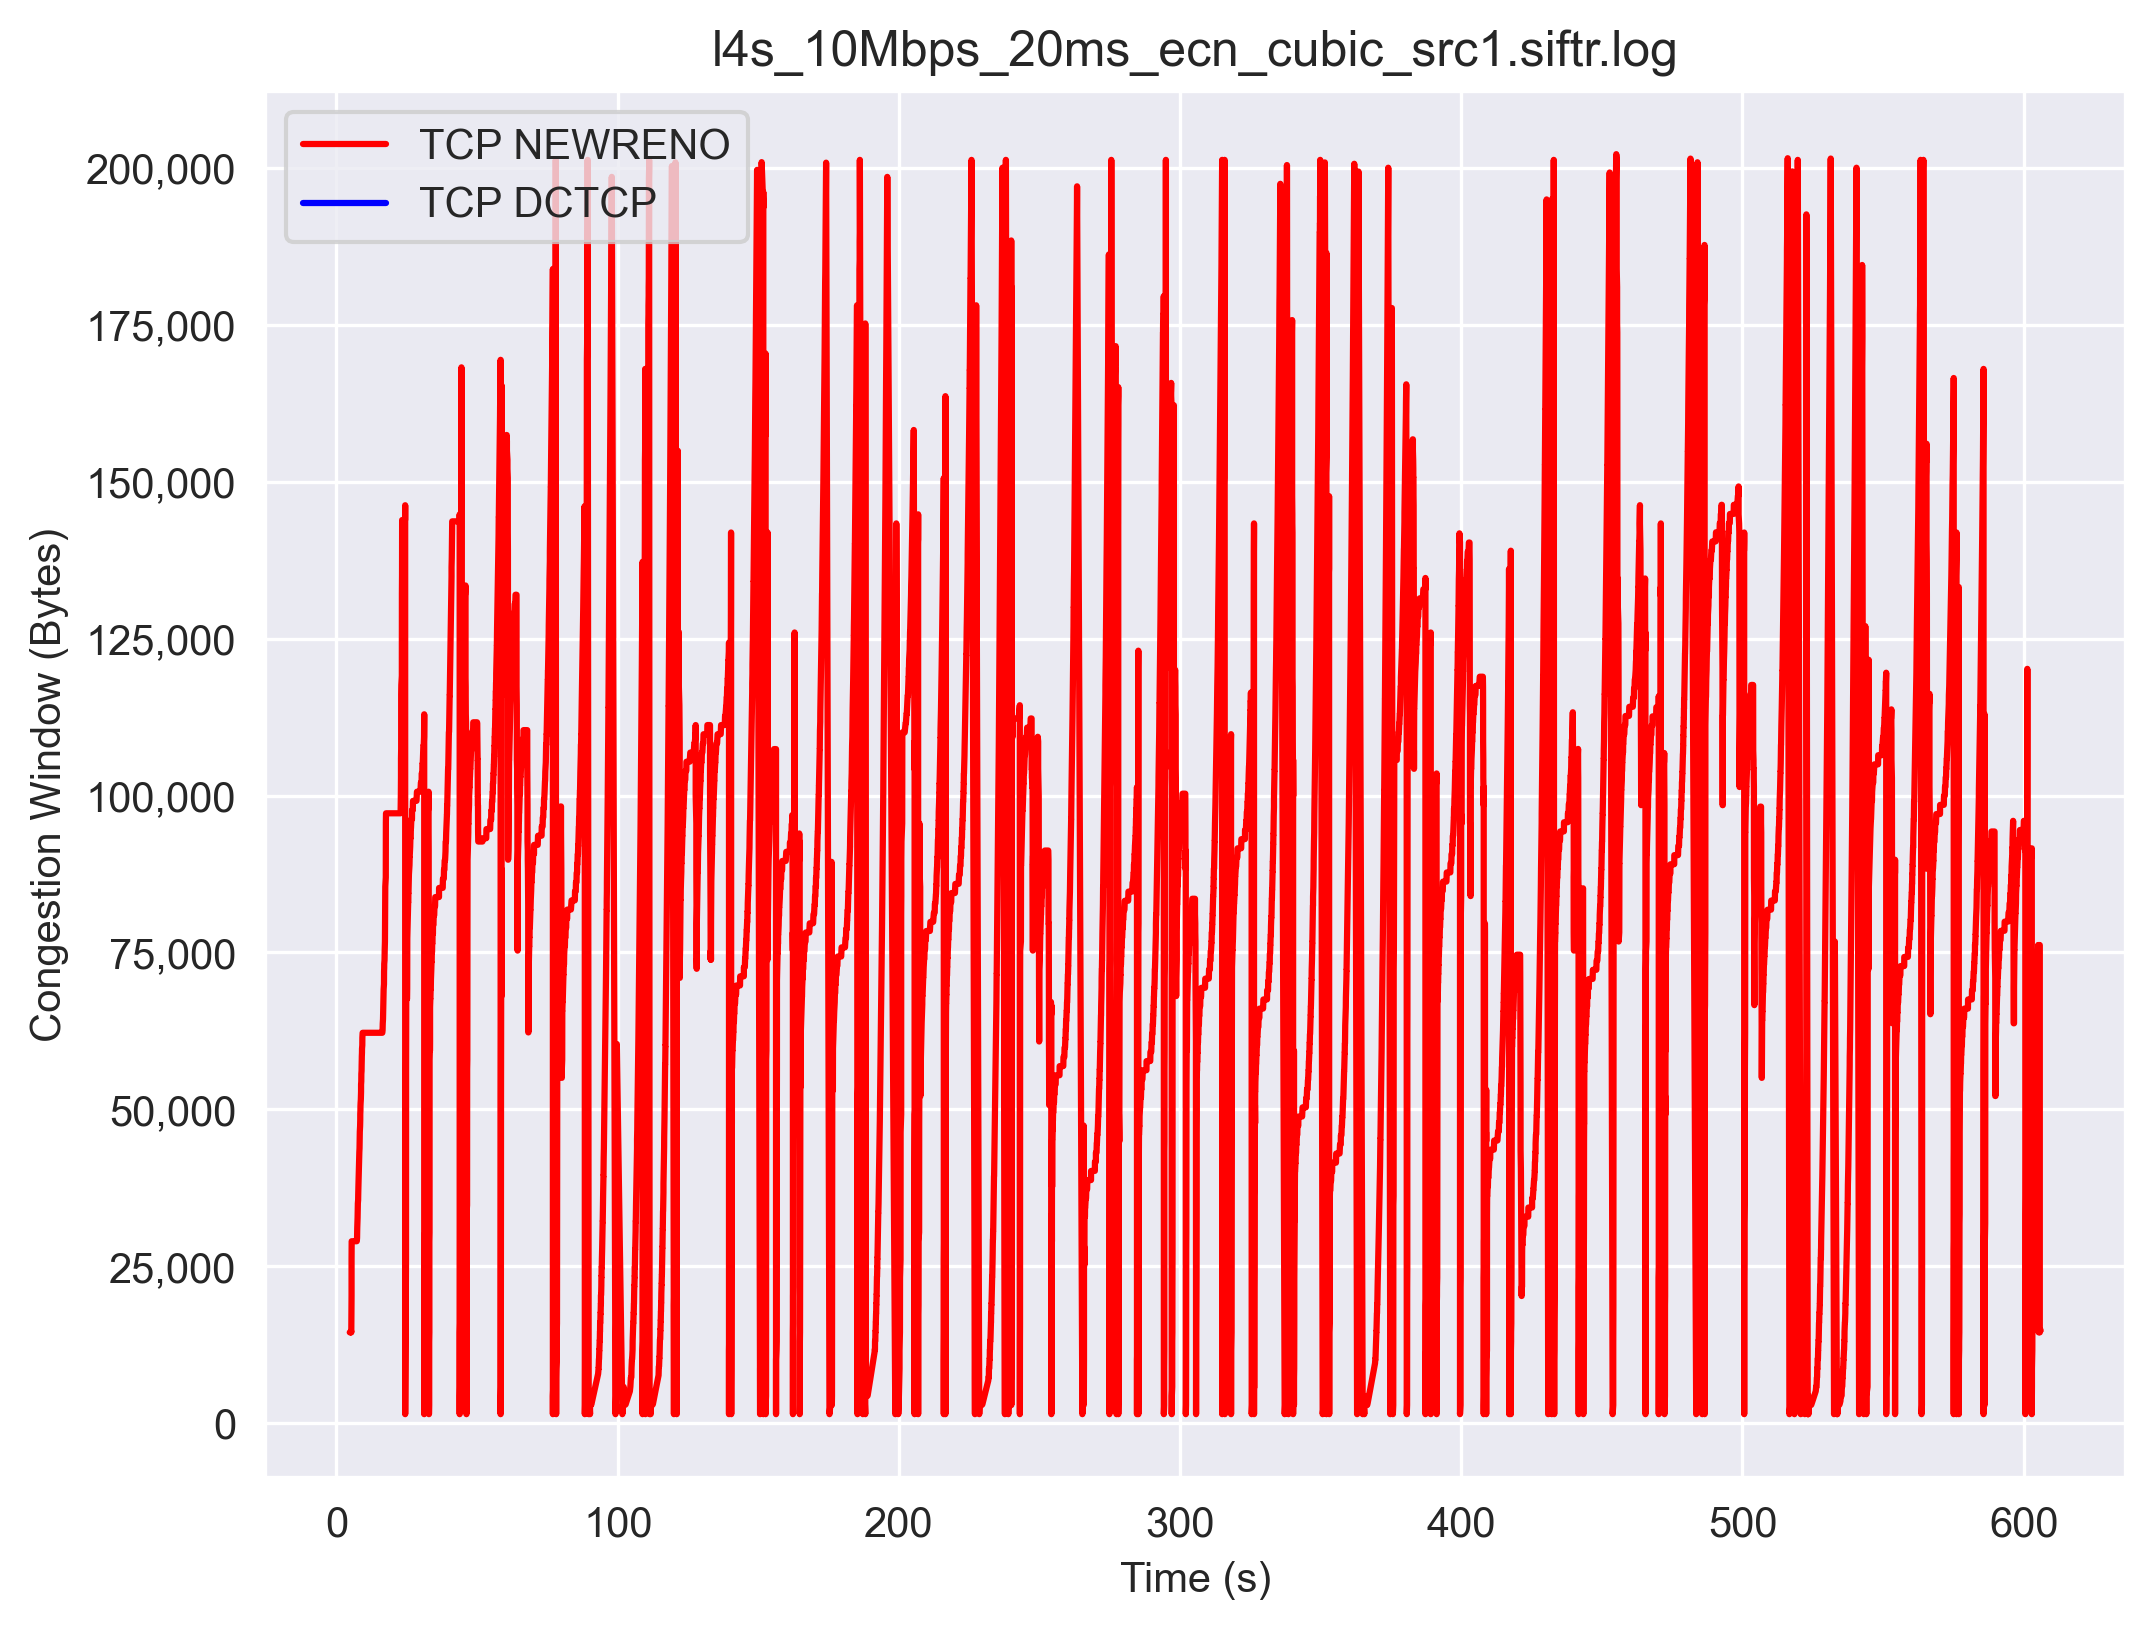

./client2_data\l4s_10Mbps_20ms_ecn_dctcp_src2.siftr.log
Statistics saved to ./stats/l4s_10Mbps_20ms_ecn_dctcp_src2.siftr.log_statistics_results.txt
Statistics saved to ./stats/l4s_10Mbps_20ms_ecn_dctcp_src2.siftr.log_statistics_results.txt
i:, 0
colors[i] r
i:, 1
colors[i] b


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


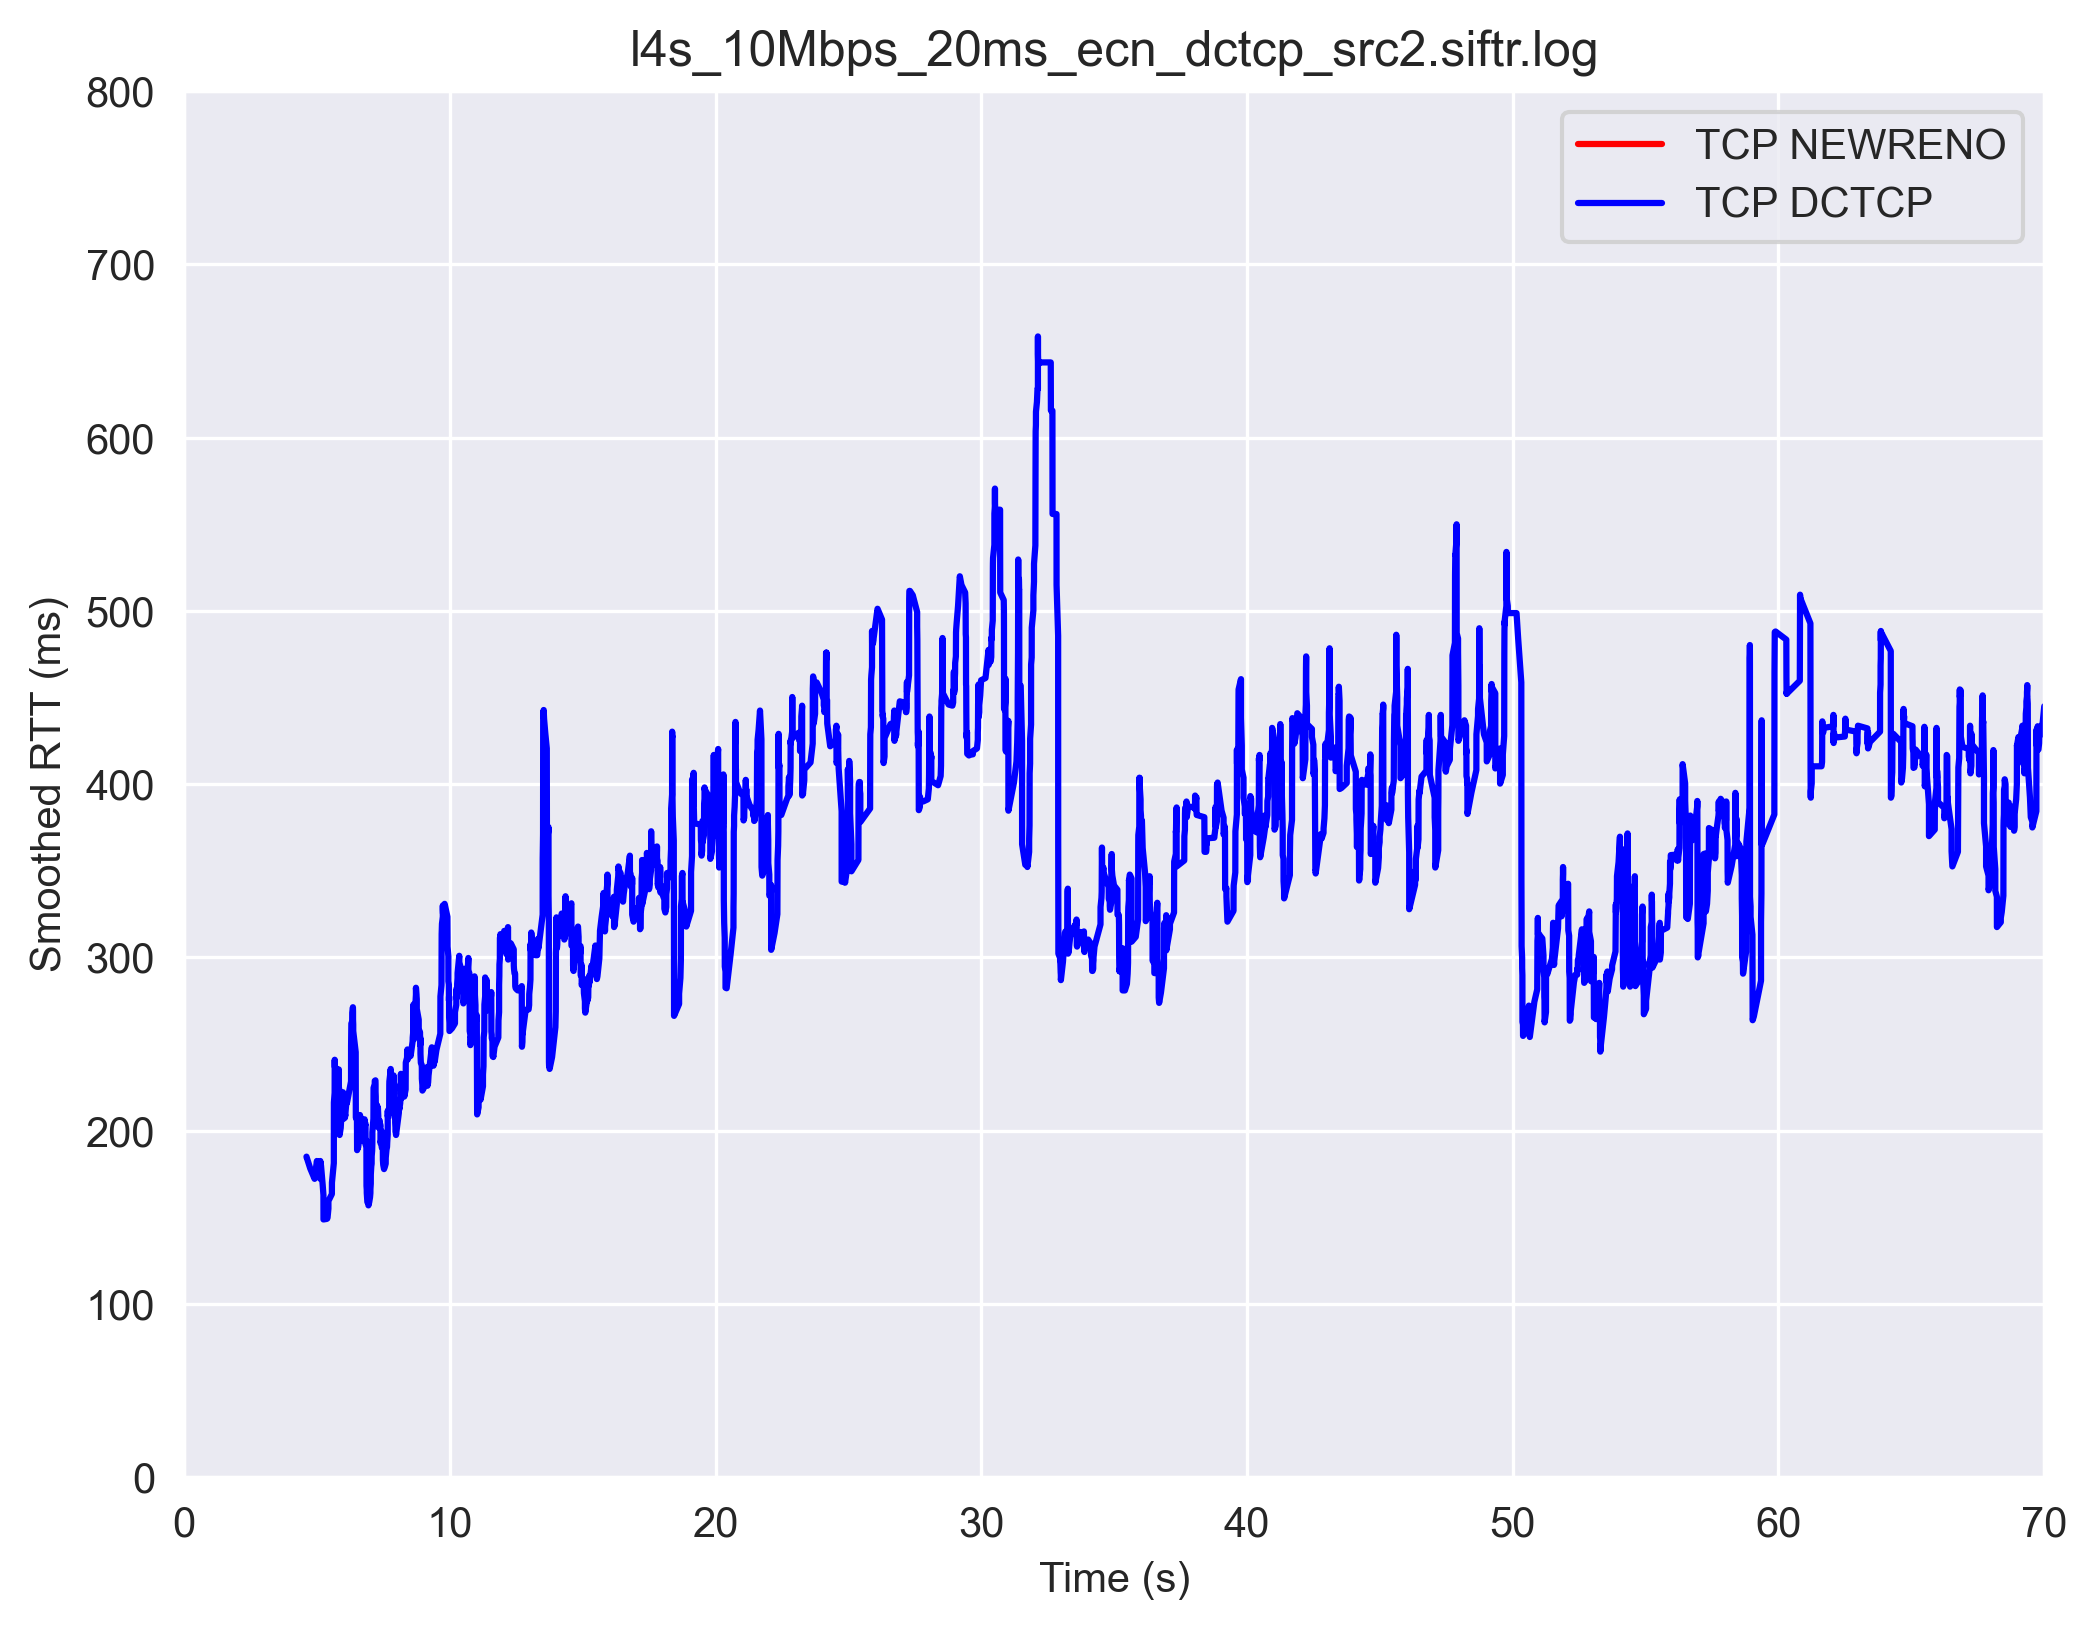

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


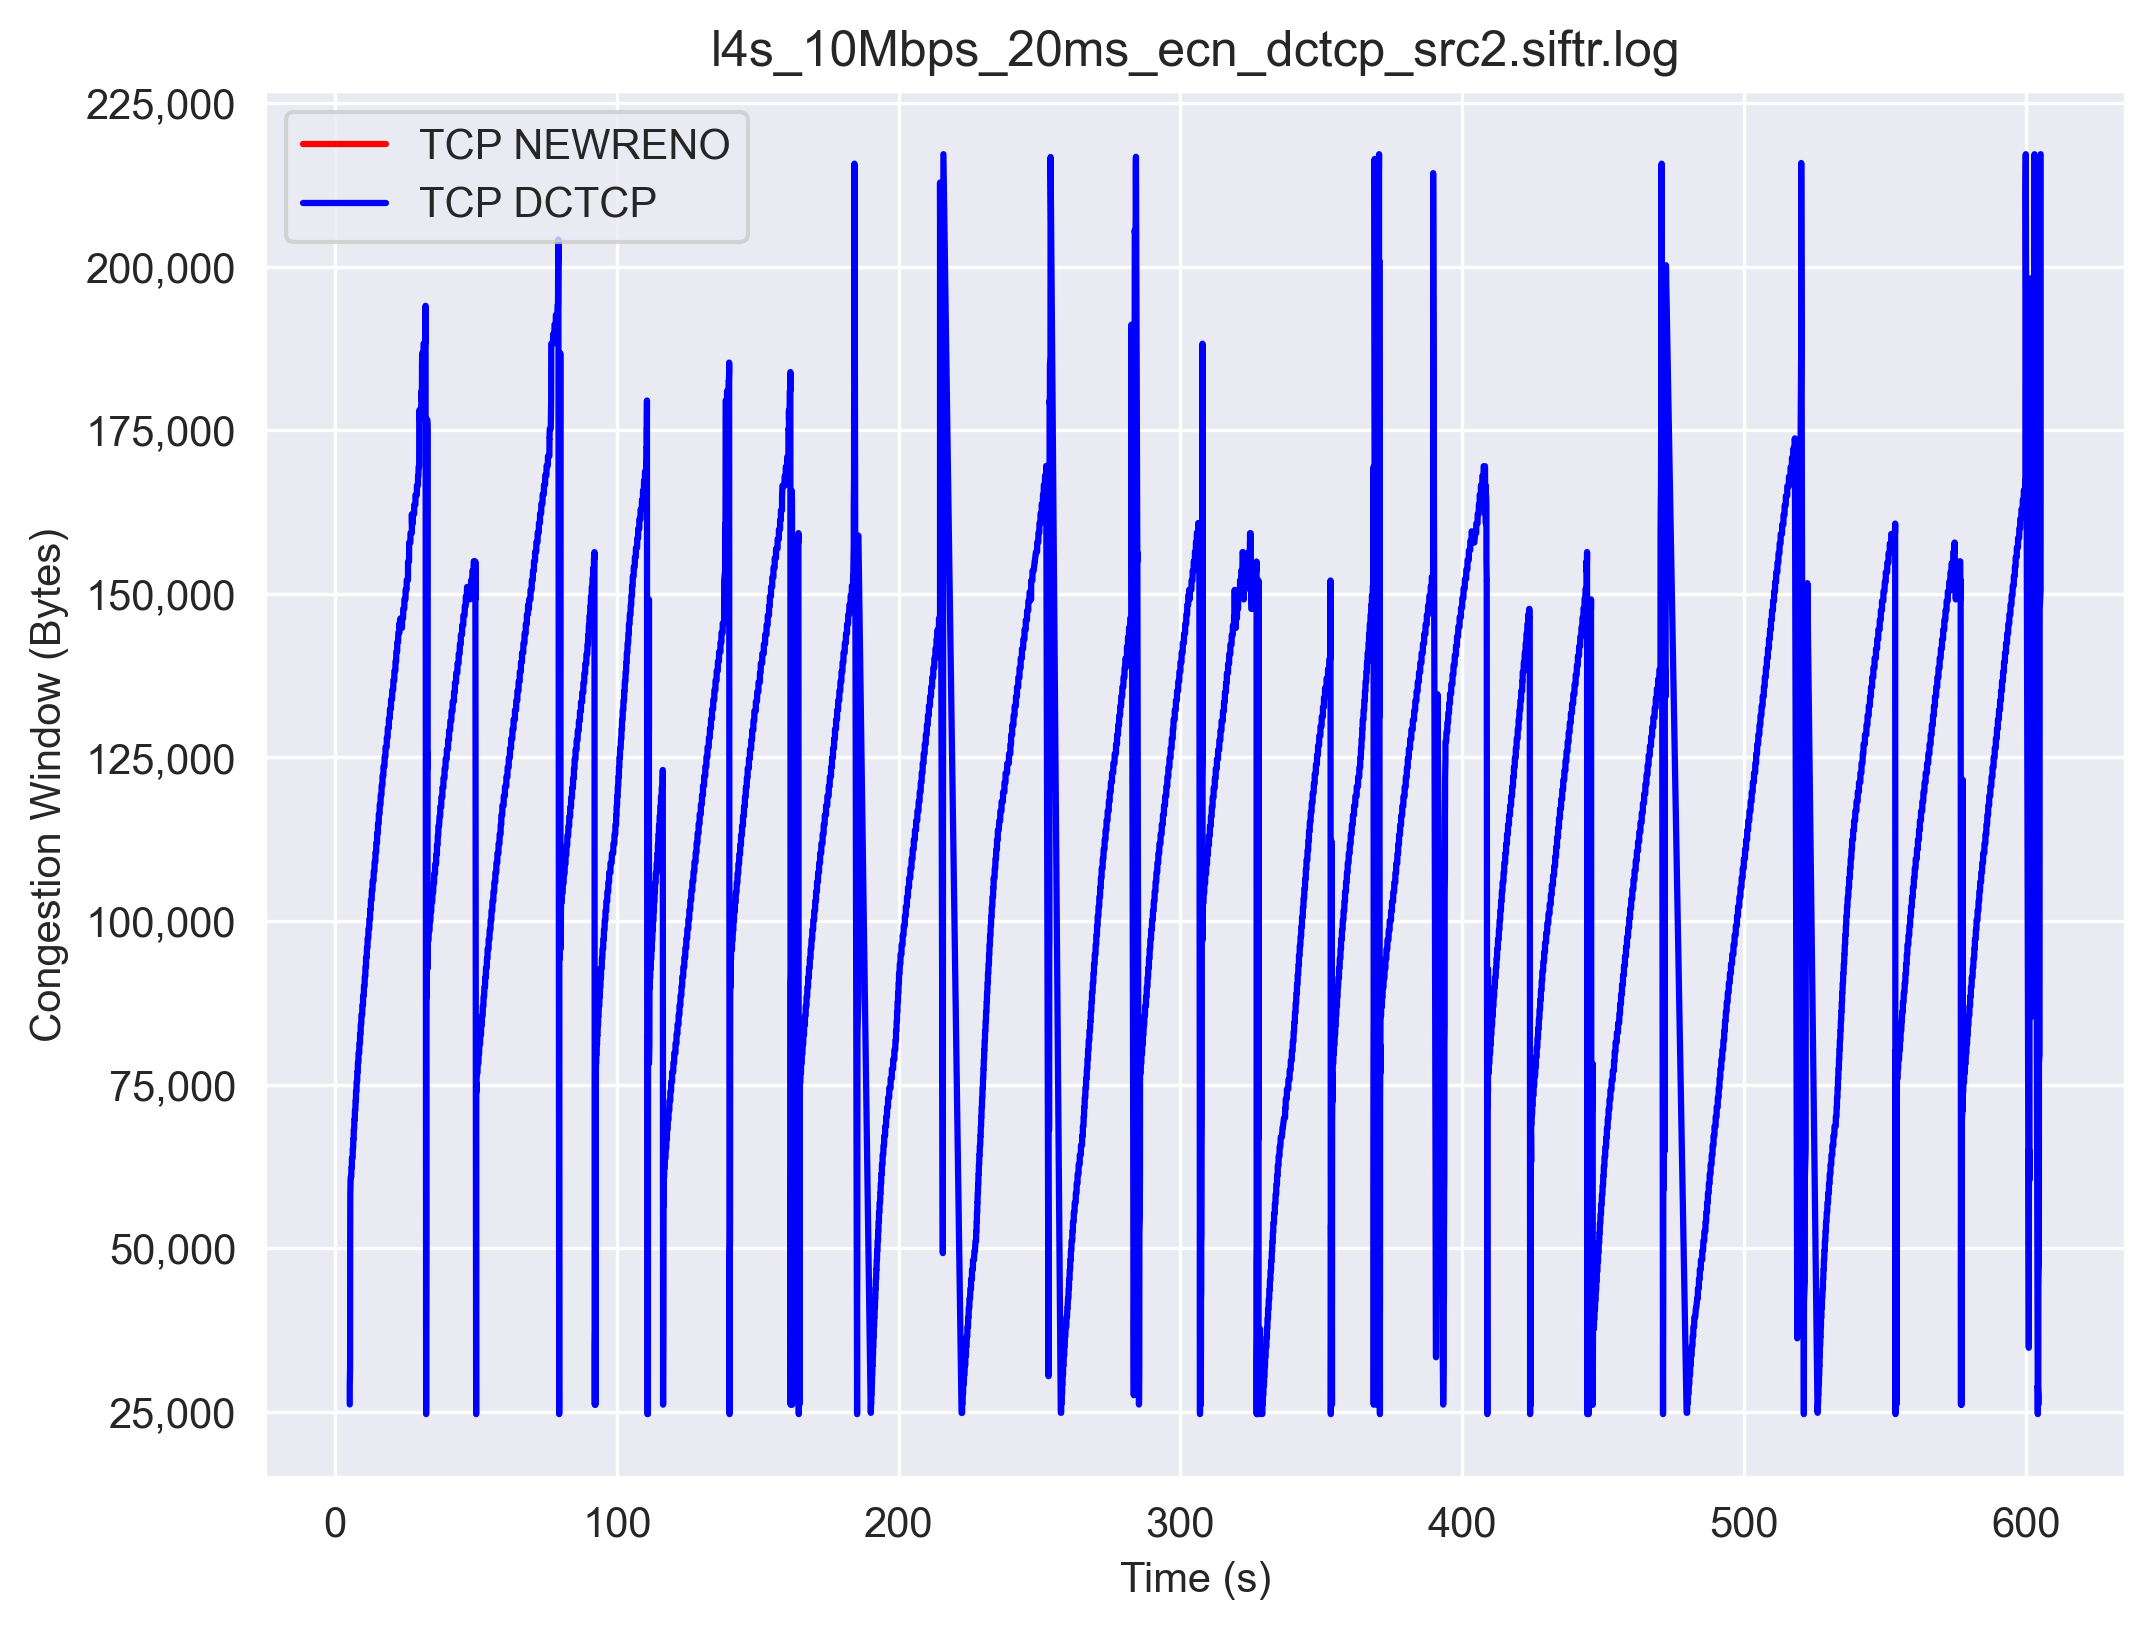

In [14]:
# Main processing loop
for index in range(len(filenames)):
    df=get_dataframe_from_filepath(filepaths[index])

    # Define paths
    paths = {
        'TCP NEWRENO': df[df['ForeignPort'] == '5101'],
        'TCP DCTCP': df[df['ForeignPort'] == '5102']
    }

    # Calculate and save statistics
    stats_filename = f"./stats/{filenames[index]}_statistics_results.txt"
    for title, path_df in paths.items():
        statistics = calculate_statistics(path_df, 'SmoothedRTT')
        save_statistics_to_file(stats_filename, statistics, title)
        print(f"Statistics saved to {stats_filename}")

    # Plot Smoothed RTT vs Time
    plt.figure(figsize=(8, 6), dpi=300)
    sns.set_style("darkgrid")
    if "10Mbps" in filenames[index]:
        plt.xlim(0,70)
        plt.ylim(0,8*100)
    elif "1Mbps" in filenames[index]:
        plt.xlim(0,70)
        plt.ylim(0,8*100)
    # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    for i, (title, path_df) in enumerate(paths.items()):
        print("i:,",i)
        print("colors[i]",colors[i])
        plt.plot(path_df['Time'], path_df['SmoothedRTT'], label=title, color=colors[i])
    plt.xlabel('Time (s)')
    plt.ylabel('Smoothed RTT (ms)')
    plt.title(filenames[index])
    plt.legend()
    plt.grid(True)
    plt.savefig(f"./Graphs/{filenames[index]}_SmoothedRTT.png", dpi=300, bbox_inches='tight')
    plt.savefig(f"./Graphs/{filenames[index]}_SmoothedRTT.eps", dpi=300, bbox_inches='tight')
    plt.show()

    # Filter outliers for CongestionWindow
    for title in paths.keys():
        paths[title] = remove_outliers_iqr(paths[title], 'CongestionWindow')

    # Plot Congestion Window vs Time
    plt.figure(figsize=(8, 6), dpi=300)
    sns.set_style("darkgrid")
    for i, (title, path_df) in enumerate(paths.items()):
        plt.plot(path_df['Time'], path_df['CongestionWindow'], label=title, color=colors[i])
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma_format))
    plt.xlabel('Time (s)')
    plt.ylabel('Congestion Window (Bytes)')
    plt.title(filenames[index])
    plt.legend()
    plt.grid(True)
    plt.savefig(f"./Graphs/{filenames[index]}_CWND.png", dpi=300, bbox_inches='tight')
    plt.savefig(f"./Graphs/{filenames[index]}_CWND.eps", dpi=300, bbox_inches='tight')
    plt.show()


In [15]:
# dataframe_list=[]
# data_filename_list=[]
# data_dict={}
# for index in range(len(filenames)):
#     # open d:/work/mptcp/twopathMPdata/test1/twopathtype1.siftr.log
#     data = []
#     with open(filepaths[index], 'r') as f:
#         # store the data
#         for line in f:
#             tem = re.sub(r'\s', '', line)
#             data.append(tem.split(','))
#     # remove file line of data
#     print(filenames[index])
#     data.pop(0)
#     data.pop(len(data)-1)


#     enable_time_secs = 1716792031
#     enable_time_usecs = 61770
#     siftver = '1.3.0'
#     sysname = 'FreeBSD'
#     sysver = 1301000
#     ipmode = 4



#     df = pd.DataFrame(data, columns=col)

#     df=df[df['Direction']=='o']

#     # congestion window to int
#     df = df.astype({'CongestionWindow': 'int32'})
    
#     # Convert 'Time' column to float64 type
#     df['Time'] = df['Time'].astype('float64')

#     # Subtract the first time entry from all the entries in 'Time' column
#     df['Time'] = df['Time'] - df['Time'].iloc[0]



#     # remove rows that congestion window bigger than 70000
#     # df = df[df['CongestionWindow'].astype(int) < 70000]
#     # RTT divide by tcp_rtt_scale * hz
#     df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')
#     df['SmoothedRTT'] = (df['SmoothedRTT'] / 1000)
#     df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')

    



#     # first path ForeignPort = 5101
#     dfPath1 = df.loc[(df['ForeignPort'] == '5101')]

#     # second path localip = 5102
#     dfPath2 = df.loc[(df['ForeignPort'] == '5102')]

#     # third path ForeignPort = 5101
#     dfPath3 = df.loc[(df['ForeignPort'] == '5103' )]

#     # fourth path localip = 5102
#     dfPath4 = df.loc[(df['ForeignPort'] == '5104')]
    
#     # data_filename_list.append(filenames[index])
#     # dataframe_list.append(dfPath1.copy())
#     # data_dict[filenames[index]]=dfPath1.copy()
#     print(dfPath4['SmoothedRTT'].describe())
#     print(dfPath4['SmoothedRTT'].head(5))
#     print(dfPath4['SmoothedRTT'].tail(5))

#     # Darker color-blind-friendly palette
#     colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
#     # Different line styles and markers
#     line_styles = ['-', '--', '-.', ':']
#     #line_styles = ['-', '-', '-', '-']
#     markers = ['o', 's', '^', 'D']

    


    

#     # Plot Smoothed RTT vs Time
#     #plt.figure(figsize=(7, 4.5))  # Set the figure size to fit within the column width
#     plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':300, 'font.size':20})
#     sns.set_style("darkgrid")  # Set the style to darkgrid

#     # if "10Mbps" in filenames[index]:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,1*100)
#     # elif "1Mbps" in filenames[index]:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,1.5*100)
#     # if "fq_codel_10Mbps_20ms_ecn" in filenames[index]:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,2.7*100)
#     #     # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#     # if "fq_codel_1Mbps_20ms_ecn" in filenames[index]:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,5.2*100)
#     #     # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    
#     # plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1',
#     #              color=colors[0], linestyle=line_styles[0])
#     # plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2',
#     #              color=colors[1], linestyle=line_styles[1])
#     # plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3',
#     #              color=colors[2], linestyle=line_styles[2])
#     # plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4',
#     #              color=colors[3], linestyle=line_styles[3])
#     # Function to calculate statistics
#     def calculate_statistics(df):
#         median = df['SmoothedRTT'].median()
#         mean = df['SmoothedRTT'].mean()
#         q25 = df['SmoothedRTT'].quantile(0.25)
#         q75 = df['SmoothedRTT'].quantile(0.75)
#         minimum = df['SmoothedRTT'].min()
#         maximum = df['SmoothedRTT'].max()
        
#         return {
#             'Median': median,
#             'Mean': mean,
#             '25th Percentile': q25,
#             '75th Percentile': q75,
#             'Minimum': minimum,
#             'Maximum': maximum
#         }

#     # Calculate statistics for each DataFrame
#     statistics_dfPath1 = calculate_statistics(dfPath1)
#     statistics_dfPath2 = calculate_statistics(dfPath2)
#     statistics_dfPath3 = calculate_statistics(dfPath3)
#     statistics_dfPath4 = calculate_statistics(dfPath4)

#     # Define the filename to save results
#     stats_filename = "./stats/"+filenames[index]+'_statistics_results.txt'

#     # Function to save statistics to a file
#     def save_statistics_to_file(stats_filename, statistics,title):
#         with open(stats_filename, 'a') as f:
#             f.write("Statistics for "+title+":\n")
#             for key, value in statistics.items():
#                 f.write(f"{key}: {value}\n")
#             f.write("\n")

#     # Save statistics for each DataFrame to the file
#     save_statistics_to_file(stats_filename, statistics_dfPath1, "TCP Stream 1")
#     save_statistics_to_file(stats_filename, statistics_dfPath2, "TCP Stream 2")
#     save_statistics_to_file(stats_filename, statistics_dfPath3, "TCP Stream 3")
#     save_statistics_to_file(stats_filename, statistics_dfPath4, "TCP Stream 4")

#     print(f"Statistics saved to {stats_filename}")
    
#     plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1',
#                  color=colors[0])
#     plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2',
#                  color=colors[1])
#     plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3',
#                  color=colors[2])
#     plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4',
#                  color=colors[3])
    
#     plt.xlabel('Time (s)')
#     plt.ylabel('Smoothed RTT (ms)')
#     plt.title(filenames[index])
#     plt.legend()
#     plt.grid(True)
#     # plt.savefig("./iperf3_tests/"+title+"-"+"Graphs.png", dpi=100,bbox_inches='tight')
#     plt.savefig("./Graphs/"+filenames[index]+"_SmoothedRTT.png", dpi=300,bbox_inches='tight')
#     plt.savefig("./Graphs/"+filenames[index]+"_SmoothedRTT.eps", dpi=300,bbox_inches='tight')
#     plt.show()

#     dfpath1_filtered = remove_outliers_iqr(dfPath1,"CongestionWindow")
#     dfpath2_filtered = remove_outliers_iqr(dfPath2,"CongestionWindow")
#     dfpath3_filtered = remove_outliers_iqr(dfPath3,"CongestionWindow")
#     dfpath4_filtered = remove_outliers_iqr(dfPath4,"CongestionWindow")

#     # Plot CWND vs Time
#     #plt.figure(figsize=(7, 4.5))  # Set the figure size to fit within the column width
#     plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':300, 'font.size':20})
#     sns.set_style("darkgrid")  # Set the style to darkgrid


#     # if contains_1_or_2(filenames[index]) == 1:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,140000)
#     # elif contains_1_or_2(filenames[index]) == 2:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,140000)

#     # if "10Mbps" in filenames[index]:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,180000)
#     # elif "1Mbps" in filenames[index] and "pie_1Mbps_20ms_ecn" not in filenames[index] and "codel_1Mbps_20ms_ecn" not in filenames[index]:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,35000)
#     # if "fq_codel_10Mbps_20ms_ecn" in filenames[index]:
#     #     # plt.xlim(0,100)
#     #     # plt.ylim(0,2.7)
#     #     plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#     # if "fq_codel_1Mbps_20ms_ecn" in filenames[index]:
#     #     # plt.xlim(0,100)
#     #     # plt.ylim(0,4.2)
#     #     plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    

    

    
   
#     plt.plot(dfpath1_filtered['Time'], dfpath1_filtered['CongestionWindow'], label='TCP Stream 1',
#                  color=colors[0])
#     plt.plot(dfpath2_filtered['Time'], dfpath2_filtered['CongestionWindow'], label='TCP Stream 2',
#                  color=colors[1])
#     plt.plot(dfpath3_filtered['Time'], dfpath3_filtered['CongestionWindow'], label='TCP Stream 3',
#                  color=colors[2])
#     plt.plot(dfpath4_filtered['Time'], dfpath4_filtered['CongestionWindow'], label='TCP Stream 4',
#                  color=colors[3])
#     import matplotlib.ticker as ticker
#     # Format y-axis labels with commas
#     def comma_format(x, pos):
#         return f'{int(x):,}'

#     plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma_format))



#     # from matplotlib.ticker import ScalarFormatter
    
#     # colors = ['blue', 'green', 'red', 'purple']

#     # fig, ax = plt.subplots()

#     # ax.plot(dfpath1_filtered['Time'], dfpath1_filtered['CongestionWindow'], label='TCP Stream 1')
#     # ax.plot(dfpath2_filtered['Time'], dfpath2_filtered['CongestionWindow'], label='TCP Stream 2')
#     # ax.plot(dfpath3_filtered['Time'], dfpath3_filtered['CongestionWindow'], label='TCP Stream 3')
#     # ax.plot(dfpath4_filtered['Time'], dfpath4_filtered['CongestionWindow'], label='TCP Stream 4')

#     # # Use scientific notation in the form of 10^x
#     # formatter = ScalarFormatter(useMathText=True)
#     # formatter.set_scientific(True)
#     # formatter.set_powerlimits((0, 0))
#     # ax.yaxis.set_major_formatter(formatter)

#     # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    
#     plt.xlabel('Time (s)')
#     plt.ylabel('Congestion Window (Bytes)')
#     plt.title(filenames[index])
#     plt.legend()
#     plt.grid(True)
#     # plt.savefig("./iperf3_tests/"+title+"-"+"Graphs.png", dpi=100,bbox_inches='tight')
#     plt.savefig("./Graphs/"+filenames[index]+"_CWND.png", dpi=300,bbox_inches='tight')
#     plt.savefig("./Graphs/"+filenames[index]+"_CWND.eps", dpi=300,bbox_inches='tight')
#     plt.show()
    


In [16]:
for i in range(len(col)):
    print(i,end=",")
    print(col[i])


0,Direction
1,Time
2,LocalIP
3,LocalPort
4,ForeignIP
5,ForeignPort
6,SlowStartThreshold
7,CongestionWindow
8,BandwidthControlledWindow
9,SendingWindow
10,ReceiveWindow
11,SendingWindowScalingFactor
12,ReceiveWindowScalingFactor
13,TCPFiniteStateMachine
14,MaximumSegmentSize
15,SmoothedRTT
16,SACKEnabled
17,TCPFlags
18,RetransmissionTimeout
19,SocketSendBufferSize
20,SocketSendBufferBytes
21,SocketReceiveBufferSize
22,SocketReceiveBufferBytes
23,UnacknowledgedBytes
24,ReassemblyQueue
25,Flowid
26,Flowtype
